In [11]:
# importar bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#https://en.wikipedia.org/wiki/Iris_flower_data_set

In [7]:
from sklearn.datasets import load_iris

In [8]:
# forma 1 de ler o dataset de iris
dataset_iris = load_iris()

In [12]:
# forma 2 de ler o dataset de iris
dataset_iris = sns.load_dataset('iris')

In [14]:
dataset_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

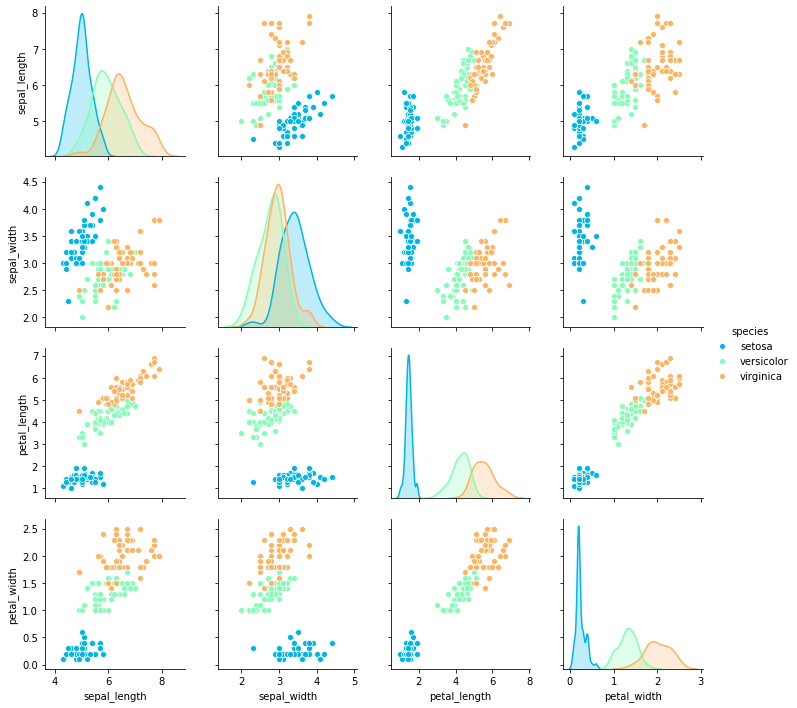

In [16]:
sns.pairplot(dataset_iris, hue='species', palette='rainbow')

In [ ]:
sns.scatterplot()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
dataset_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [23]:
X = dataset_iris.drop('species', axis=1) # axis=1 para remover a coluna species

In [26]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [27]:
y = dataset_iris['species']

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [31]:
# VAmos usar o svm

In [33]:
from sklearn.svm import SVC

In [36]:
# instanciar o modelo
modelo_svm = SVC(random_state=200)

In [39]:
# treinar o modelo
modelo_svm.fit(X_treino, y_treino)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=200,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
# vamos fazer uma predição

In [43]:
#X_dados_informados_usuario
predicoes_modelo = modelo_svm.predict(X_teste)

In [44]:
# vamos avaliar o resultado da predição

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_teste, predicoes_modelo))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.93      0.96        14
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [50]:
print(confusion_matrix(y_teste, predicoes_modelo))

[[19  0  0]
 [ 0 13  1]
 [ 0  0 12]]


In [51]:
# Vamos aplicar Gridsearch
from sklearn.model_selection import GridSearchCV

In [55]:
hiperparametros_para_otimizar = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]}

In [57]:
grid = GridSearchCV(SVC(), hiperparametros_para_otimizar, refit=True, verbose=2)

In [59]:
grid.fit(X_treino, y_treino)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [62]:

print('melhores parâmetros encontrados para SVM ',grid.best_params_)

melhores parâmetros encontrados para SVM  {'C': 10, 'gamma': 0.1}


In [64]:
predicoes = grid.predict(X_teste)

In [66]:
print(classification_report(y_teste, predicoes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.93      0.96        14
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [67]:
print(confusion_matrix(y_teste, predicoes_modelo))

[[19  0  0]
 [ 0 13  1]
 [ 0  0 12]]
